## Fase 3 

**Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo**

**Objetivo del Ejercicio**
Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos
reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:

1.  Preparación de Datos:

Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'

In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
from scipy import stats
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest
from scipy.stats import mannwhitneyu
from scipy.stats import f_oneway

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv ('Flights.csv')
df.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,January,3,0,3,1521,152,0,0.0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.00,Married,Aurora,7919.20,Standard,2016,August,Unknown,Unknown
1,100102,2017,January,10,4,14,2030,203,0,0.0,Ontario,Toronto,M1R 4K3,Male,College,79371.73,Single,Nova,2887.74,Standard,2013,March,Unknown,Unknown
2,100140,2017,January,6,0,6,1200,120,0,0.0,British Columbia,Dawson Creek,U5I 4F1,Female,College,79371.73,Divorced,Nova,2838.07,Standard,2016,July,Unknown,Unknown
3,100214,2017,January,0,0,0,0,0,0,0.0,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.00,Married,Star,4170.57,Standard,2015,August,Unknown,Unknown
4,100272,2017,January,0,0,0,0,0,0,0.0,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.00,Divorced,Star,6622.05,Standard,2014,January,Unknown,Unknown


In [9]:
df_col_relevantes= df[['flights_booked', 'education']]
df_col_relevantes

,flights_booked,education
0,3,Bachelor
1,10,College
2,6,College
3,0,Bachelor
4,0,Bachelor
...,...,...
403755,0,College
403756,0,Doctor
403757,3,Bachelor
403758,0,College


2.  Análisis Descriptivo:

Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del
número de vuelos reservados para cada grupo

In [10]:
# Vamos a crear un dataframe para ver la cantidad de 'Flights booked' en función de la educación.
df_flights = df.groupby('education')['flights_booked'].sum().reset_index()
df_flights

,education,flights_booked
0,Bachelor,1038123
1,College,426398
2,Doctor,74036
3,High School or Below,78993
4,Master,51614


In [11]:
df['education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

Vamos a realizar un análisis por cada nivel educativo

In [16]:
df_bachelor = df[df['education'] == 'Bachelor']

In [17]:
df_bachelor['flights_booked'].describe().T.reset_index()

,index,flights_booked
0,count,252567.000000
1,mean,4.110288
2,std,5.221671
3,min,0.000000
4,25%,0.000000
5,50%,1.000000
6,75%,8.000000
7,max,21.000000


In [18]:
df_college = df[df['education'] == 'College']

In [19]:
df_college['flights_booked'].describe().T.reset_index()

,index,flights_booked
0,count,102260.000000
1,mean,4.169744
2,std,5.246040
3,min,0.000000
4,25%,0.000000
5,50%,1.000000
6,75%,8.000000
7,max,21.000000


In [30]:
df_master = df[df['education'] == 'Master']

In [31]:
df_master['flights_booked'].describe().T.reset_index()

,index,flights_booked
0,count,12287.000000
1,mean,4.200700
2,std,5.213956
3,min,0.000000
4,25%,0.000000
5,50%,1.000000
6,75%,8.000000
7,max,21.000000


In [23]:
df_high_school = df[df['education'] == 'High School or Below']

In [24]:
df_high_school['flights_booked'].describe().T.reset_index()

,index,flights_booked
0,count,18915.000000
1,mean,4.176209
2,std,5.239267
3,min,0.000000
4,25%,0.000000
5,50%,1.000000
6,75%,8.000000
7,max,21.000000


In [25]:
df_doctor = df[df['education'] == 'Doctor']

In [26]:
df_doctor['flights_booked'].describe().T.reset_index()

,index,flights_booked
0,count,17731.000000
1,mean,4.175512
2,std,5.256971
3,min,0.000000
4,25%,0.000000
5,50%,1.000000
6,75%,8.000000
7,max,21.000000


In [32]:
df_flights_mean= df['flights_booked'].mean()
df_flights_mean

4.134049930651872

In [33]:
df_flights_std= df['flights_booked'].std()
df_flights_std

5.23006372447621

Vemos que no existe mucha diferencia entre las medias de cada nivel educativo, pero sí que existe una gran diferencia entre la media y la mediana de cada uno de ellos.

Cuando hay una gran diferencia entre la media y la mediana de un conjunto de datos, generalmente indica que la distribución de los datos está sesgada.

Si la media es mayor que la mediana, se dice que la distribución está sesgada hacia la derecha o positivamente sesgada. 
Esto significa que hay valores extremadamente altos (Outliers) que están tirando de la media hacia arriba.

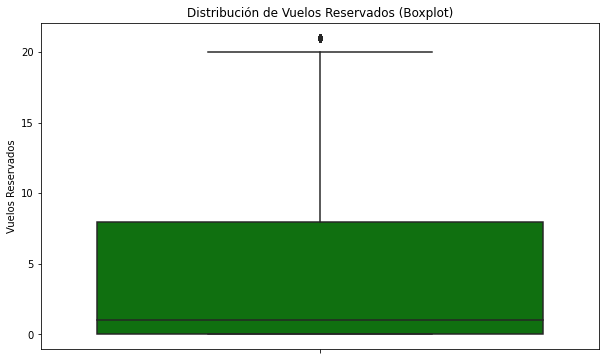

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='flights_booked', color='green')
plt.ylabel('Vuelos Reservados')
plt.title('Distribución de Vuelos Reservados (Boxplot)')
plt.show()


3.  Prueba Estadística:

Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes
niveles educativos

Definir hipótesis nula y alternativa:

**Hipótesis nula (H0):** No hay diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

**Hipótesis alternativa (H1):** Existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

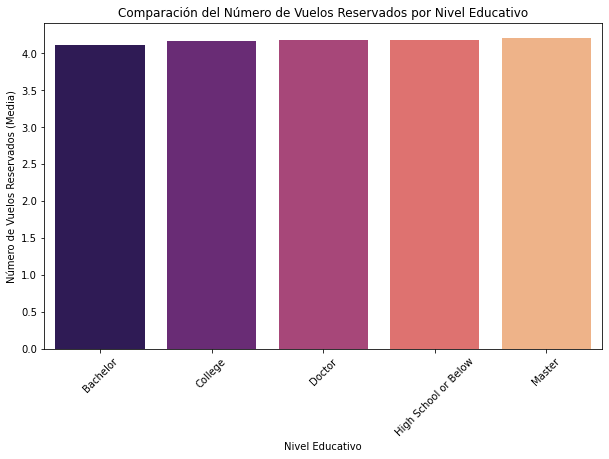

In [44]:
# Calcular la media y el intervalo de confianza para cada nivel educativo
media = df.groupby('education')['flights_booked'].mean()
desv = df.groupby('education')['flights_booked'].std()

# Crear el gráfico de barras con intervalos de confianza
plt.figure(figsize=(10, 6))
sns.barplot(x=media.index, y=media.values, ci=desv.values, palette='magma')
plt.xlabel('Nivel Educativo')
plt.ylabel('Número de Vuelos Reservados (Media)')
plt.title('Comparación del Número de Vuelos Reservados por Nivel Educativo')
plt.xticks(rotation=45)
plt.show()


A priori, no parece que exista mucha diferencia entre los niveles educativos y el número de vuelos reservados


Antes de realizar el test estadístico para comparar los grupos, es importante asegurarse de que se cumplan ciertos supuestos. Estos supuestos incluyen que los datos sigan una distribución normal, que las varianzas entre los grupos sean similares y que las observaciones sean independientes entre sí. 
Si alguno de estos supuestos no se cumple, podría afectar la validez de los resultados del análisis estadístico. 
Por lo tanto, es fundamental verificar estos supuestos antes de proceder con el análisis.


Vamos a estudiar si los valores siguen una distribución normal. Es decir, si los datos siguen una distribución normal o gaussiana, lo que implica que la mayoría de los datos están cerca de la media y se distribuyen simétricamente en torno a ella.

Para interpretar los resultados:

- Si el p-value > 0.05, lo que sugiere que los datos siguen una distribución normal.

- Si el p-value < 0.05, lo que sugiere que los datos no siguen una distribución normal.

In [52]:
def test_normalidad(dataframe, columna):

    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal: No se puede rechazar H0")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal:Se rechaza H0" )

In [53]:
test_normalidad(df, 'flights_booked')

Para la columna flights_booked los datos no siguen una distribución normal:Se rechaza H0


Como los datos no siguen una distribución normal, tenemos que realizar el test de Mann-Whitney U

In [55]:
def mann_whitney_u_test(data1, data2, alpha=0.05):
    
    # Realizar el test de Mann-Whitney U
    stat, p_valor = mannwhitneyu(data1, data2)
    
    # Comprobar el valor p frente al nivel de significancia
    if p_valor > alpha:
        resultado = "No hay evidencia suficiente para rechazar la hipótesis nula (H0)"
    else:
        resultado = "Hay una diferencia significativa entre los grupos (Se rechaza H0)"
    
    return resultado, p_valor


In [56]:
# Ejemplo de uso
resultado, p_valor = mann_whitney_u_test(df_group1['flights_booked'], df_group2['flights_booked'])
print("Resultado:", resultado)
print("Valor p:", p_valor)

NameError: name 'df_group1' is not defined